### Imports

In [1]:
import pytrends
import numpy as np
import pandas as pd
import requests
import lxml
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


num = 500
pd.set_option('display.max_columns', num)
pd.set_option('display.max_rows', num)
pd.set_option('display.max_colwidth', num)


### Opens Google.Trends request

In [2]:
from pytrends.request import TrendReq

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)

### Functions

In [3]:
def query_entry(num_queries):

    """
    Get user input for queries
    """
    query_list = []
    
    i = 0

    for i in range(num_queries):
        query_list.append(input("Please enter keyword for query: "))
        
    return query_list

In [4]:
def num_of_queries():
    
    """
    Get number of queries
    """
    num = int(input("Please enter number of queries to search and compare(max 5): "))

    if num > 5 or num < 0:
        while num > 5 or num < 0:
            num = int(input("Please enter number of queries to search and compare(max 5): "))


    return num
    

In [5]:
def custom_interest_over_time(search_term, time, location):
    
    """
    Function to build payload and display results for 1 query's trend interest over time
    """
    
    num_queries = 1
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States or 'CO' for Columbia,
    #           leave empty for global results
    
    
    pytrend.build_payload(kw_list = search_term, timeframe = time, geo=location)
    
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'], axis=1)
    print(interest_over_time_df)
    
    interest_over_time_df.plot()
    
    
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
    #Plots interest by region per state within selected timeframe
    interest_by_region_df.plot(figsize=(100, 10), kind ='bar')
    return

In [6]:
def custom_interest_over_time_multi(search_terms, time, location):
   
    """
    Function to build payload and display results for multiple queries' trend interest over time
    """
    num_queries = len(search_terms)
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States or 'CO' for Columbia,
    #           leave empty for global results
    
    #search_terms = list of 5 terms max
    
    pytrend.build_payload(kw_list = search_terms, timeframe = time, geo=location)
    
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.drop(['isPartial'], axis=1)
    interest_over_time_df.plot()
    print(interest_over_time_df)
    
    interest_by_region_df = pytrend.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)

    #Plots interest by region per state within selected timeframe
    interest_by_region_df.plot(figsize=(100, 10), kind ='bar')
    
    return

In [7]:
def custom_related_searches(search_terms, time, location):
    
    """
    Function to build payload and display results for Related Queries, returns a dictionary of dataframes
    """
    
    #time = Timeframe of interest: 
    #       now/today *number*-(H, d, m, y): for # of Hours, days, months, or years, use largest interval, 
    #       i.e. 3-m rather than 90-d
    #       OR use 'all'
 
    #location = Two letter country code for searches,  i.e. 'US' for United States or 'CO' for Columbia,
    #           leave empty for global results
    
    #search_terms = list of 5 terms max
    
    i = 0
    column_names = []
    related_list = []
    frames_master = pd.DataFrame(related_list)
    pytrend.build_payload(kw_list = search_terms, timeframe = time, geo=location)   
    
    
    num_queries = len(search_terms)
    # Uses the keyword to find trending searches over preset time period
    related_queries_dict = pytrend.related_queries()
    for i in range(num_queries):
        #Top List maxes out at 100
        related_top = pd.DataFrame(related_queries_dict[search_terms[i]]['top'])
        #Rising List is a percentage increase in searches over preset time period
        related_rising = pd.DataFrame(related_queries_dict[search_terms[i]]['rising'])
    
        # adding values to results list for top and rising results
        related_list.append(related_top)
        related_list.append(related_rising)
        frames_master = pd.concat(related_list, axis=1)
    
        #Customizing column names for readability
        if (time[0] == 't' or time[0] == 'n'):
            column_names.append(search_terms[i] + ' top searches over' + time[5:10])
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches over' + time[5:10])
            column_names.append('percent increase')
        else:
            column_names.append(search_terms[i] + ' top searches since 2004')
            column_names.append('rank')
            column_names.append(search_terms[i] + ' rising searches since 2004')
            column_names.append('percent increase')

    frames_master.columns = column_names
    frames_master
    
    return frames_master

### Payload Customization

In [8]:
# Create payload and capture API tokens. 
# Only needed for interest_over_time(), interest_by_region() & related_queries()
# Up to five terms in a list

# Available TimeFrames:: 5-y, 12-m, 3-m, 30-d, 7-d, 1-d, 4-H, 1-H
# OR give a timeframe of two dates in 'YYYY-MM-DD YYYY-MM-DD' format
# If Given a 500 error code, it is Google issue with query, may see request as spam or sketchy code
# OR data is unavailable for timeframe
# ex. user_timeframe = 'today 3-m' 

# Country of interest, leave empty for global interest
# ex. user_geo = 'US'



### API testing

            Joe Biden
date                 
2004-01-01          0
2004-02-01          0
2004-03-01          0
2004-04-01          1
2004-05-01          1
2004-06-01          1
2004-07-01          1
2004-08-01          0
2004-09-01          0
2004-10-01          1
2004-11-01          0
2004-12-01          0
2005-01-01          1
2005-02-01          1
2005-03-01          0
2005-04-01          0
2005-05-01          0
2005-06-01          1
2005-07-01          0
2005-08-01          1
2005-09-01          1
2005-10-01          0
2005-11-01          1
2005-12-01          0
2006-01-01          1
2006-02-01          1
2006-03-01          0
2006-04-01          1
2006-05-01          1
2006-06-01          1
2006-07-01          1
2006-08-01          1
2006-09-01          1
2006-10-01          1
2006-11-01          1
2006-12-01          1
2007-01-01          2
2007-02-01          4
2007-03-01          1
2007-04-01          1
2007-05-01          1
2007-06-01          2
2007-07-01          3
2007-08-01

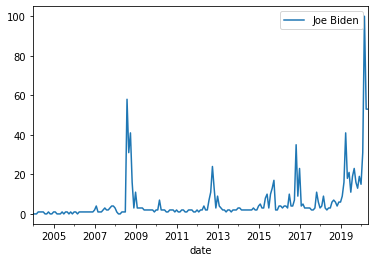

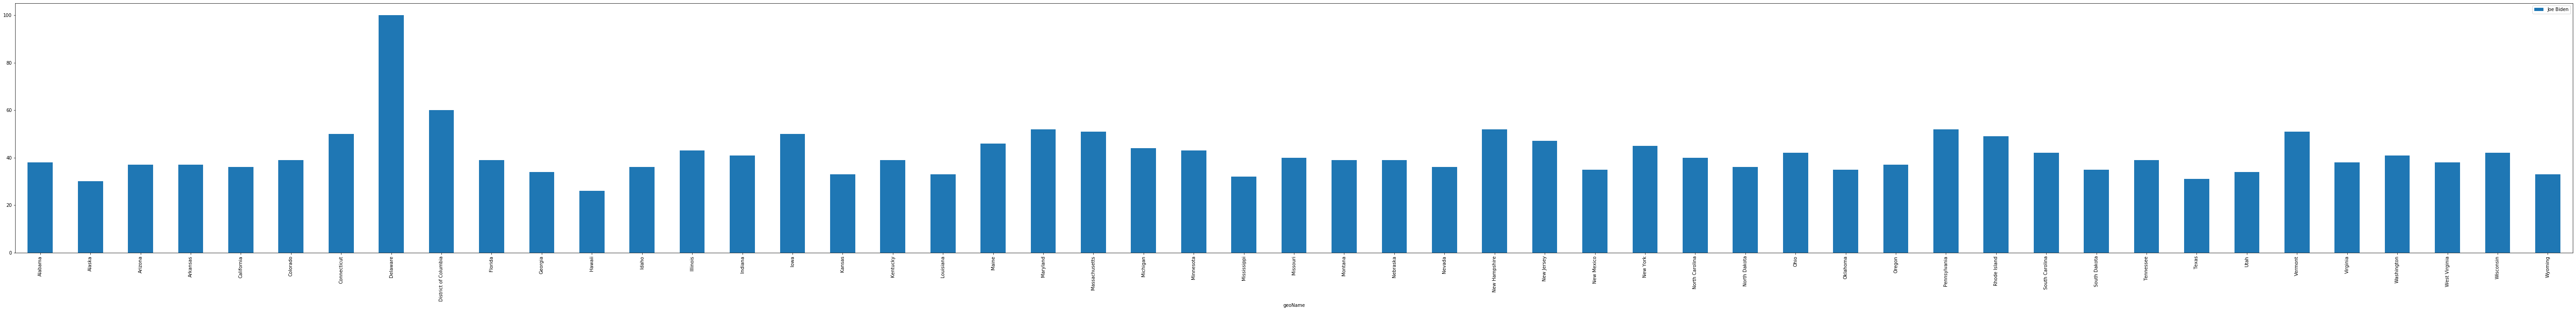

In [9]:
term1 = []
term1.append('Joe Biden')
time1 = 'all'

geo_cust1 = 'US'

custom_interest_over_time(term1, time1, geo_cust1)

            Joe Biden  Bernie Sanders  Elizabeth Warren
date                                                   
2019-06-02          5               4                 5
2019-06-09          7               5                 5
2019-06-16          8               5                 5
2019-06-23         17              16                15
2019-06-30          7               7                 5
2019-07-07          5               5                 4
2019-07-14          4               5                 4
2019-07-21          3               6                 4
2019-07-28         12              13                11
2019-08-04         10               9                 6
2019-08-11          6               8                 6
2019-08-18          5               8                 7
2019-08-25          6               8                 6
2019-09-01          7               7                 5
2019-09-08         11              11                11
2019-09-15          8               7           

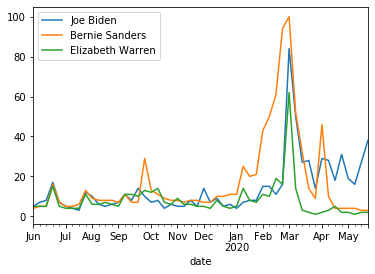

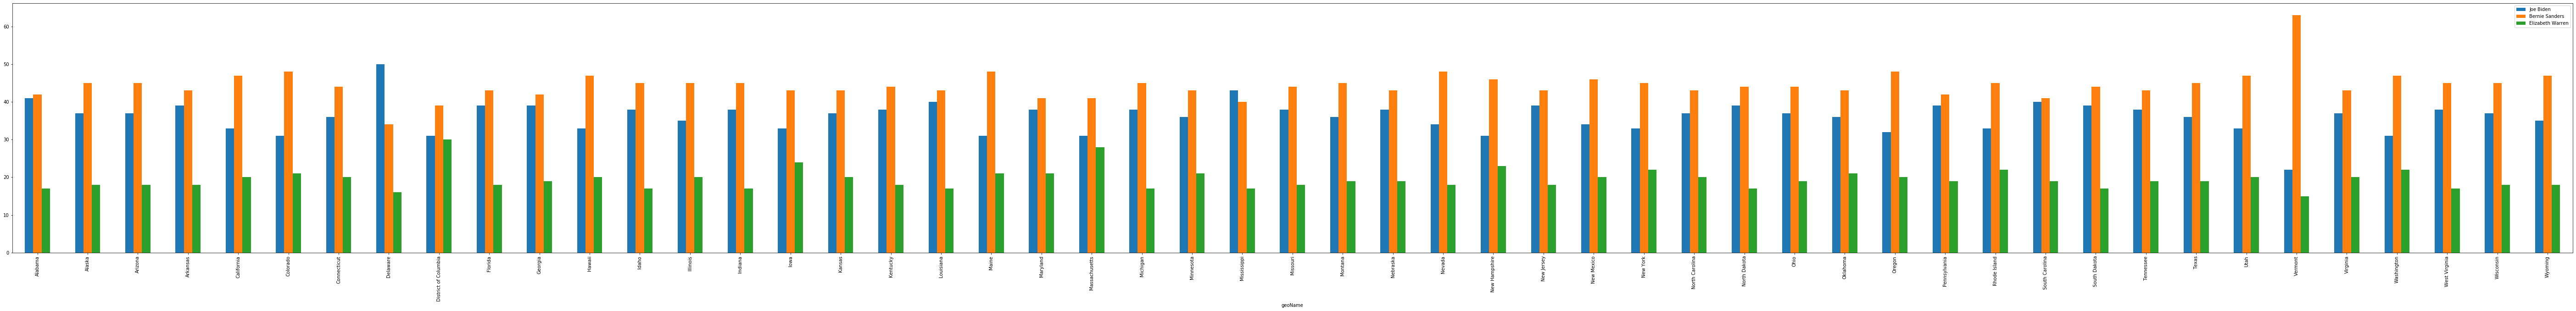

In [10]:
term2 = []
term2.append('Joe Biden')
term2.append('Bernie Sanders')
term2.append('Elizabeth Warren')
time2 = 'today 12-m'

geo_cust2 = ''

custom_interest_over_time_multi(term2, time2, geo_cust2)

In [11]:
term3 = []
term3.append('Joe Biden')
term3.append('Bernie Sanders')
term3.append('Elizabeth Warren')
time3 = 'all'

geo_cust3 = ''

related_terms = custom_related_searches(term3, time3, geo_cust3)
related_terms

,Joe Biden top searches since 2004,rank,Joe Biden rising searches since 2004,percent increase,Bernie Sanders top searches since 2004,rank,Bernie Sanders rising searches since 2004,percent increase,Elizabeth Warren top searches since 2004,rank,Elizabeth Warren rising searches since 2004,percent increase
0,joe biden trump,100,joe biden trump,649200,trump,100,trump,712700,bernie,100,bernie,490800
1,trump,97,trump,630350,hillary clinton,65,hillary clinton,460250,bernie sanders,89,bernie sanders,435150
2,obama,72,bernie sanders,455650,donald trump,52,donald trump,372850,trump,88,trump,433800
3,bernie sanders,70,joe biden bernie sanders,441950,bernie sanders age,43,bernie sanders age,304400,elizabeth warren bernie sanders,87,elizabeth warren bernie sanders,428800
4,joe biden bernie sanders,68,joe biden president,440650,bernie sanders primary,40,bernie sanders primary,284400,elizabeth warren trump,87,elizabeth warren trump,426000
5,joe biden president,68,age joe biden,367550,biden,38,biden,270700,biden,55,biden,272050
6,age joe biden,57,joe biden 2020,305600,bernie sanders president,32,bernie sanders president,228900,elizabeth warren native american,50,elizabeth warren native american,245000
7,joe biden 2020,47,donald trump joe biden,283950,bernie sanders news,31,bernie sanders worth,217650,elizabeth warren 2020,48,elizabeth warren 2020,234000
8,donald trump joe biden,44,donald trump,282100,bernie sanders worth,31,joe biden,216700,elizabeth warren age,44,elizabeth warren age,214550
9,donald trump,43,joe biden young,252100,joe biden,30,bernie sanders joe biden,215250,joe biden,42,joe biden,208250
